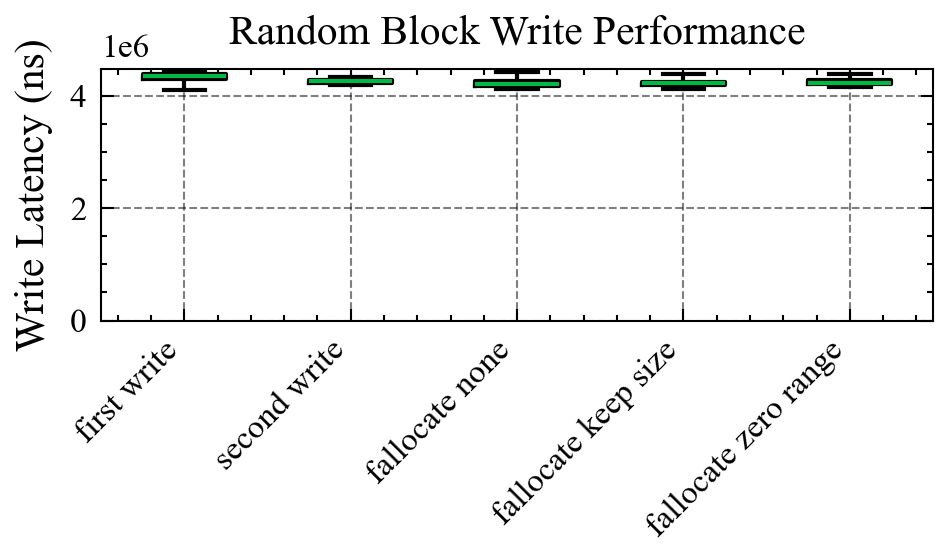

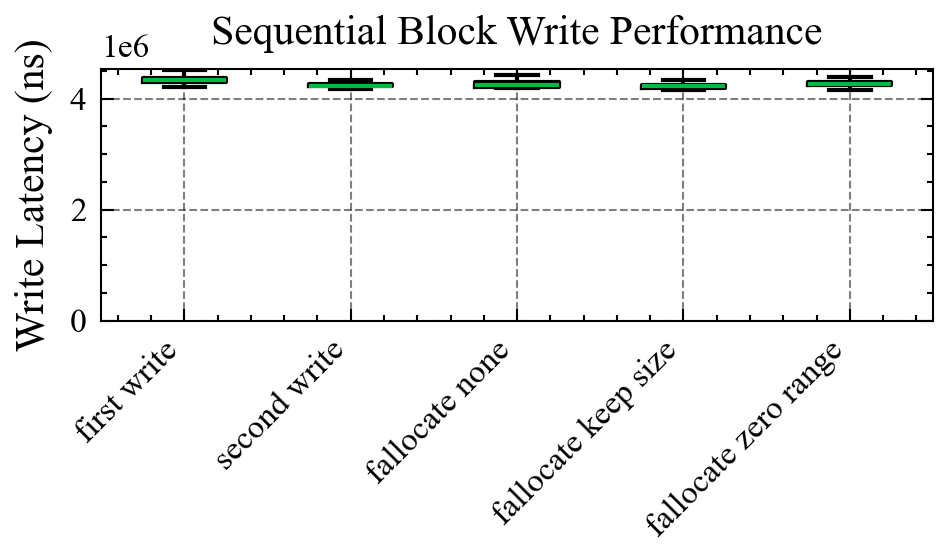

In [ ]:
import os
import re
import matplotlib.pyplot as plt
plt.style.use('custom_plt_sytle.mplstyle')

def extract_boxplot_stats(file_content):
    """
    Extracts the percentiles needed for the box plot from the file content.
    """
    # Define regex patterns for each statistic
    pattern_2th = r"2th percentile:\s*([\d\.]+)"
    pattern_q1 = r"25th percentile:\s*([\d\.]+)"
    pattern_med = r"Median:\s*([\d\.]+)"
    pattern_q3 = r"75th percentile:\s*([\d\.]+)"
    pattern_98th = r"98th percentile:\s*([\d\.]+)"
    
    # Search the file content
    m2 = re.search(pattern_2th, file_content)
    mq1 = re.search(pattern_q1, file_content)
    mmed = re.search(pattern_med, file_content)
    mq3 = re.search(pattern_q3, file_content)
    m98 = re.search(pattern_98th, file_content)
    
    # If all are found, return a dictionary of statistics
    if m2 and mq1 and mmed and mq3 and m98:
        return {
            'whislo': float(m2.group(1)),
            'q1': float(mq1.group(1)),
            'med': float(mmed.group(1)),
            'q3': float(mq3.group(1)),
            'whishi': float(m98.group(1))
        }
    else:
        return None

def plot(files, plot_title):
    
    boxplot_stats = []
    
    for (file_name, title) in files:
        try:
            with open(file_name, 'r') as file:
                content = file.read()
                stats = extract_boxplot_stats(content)
                if stats:
                    stats['label'] = title  # Use filename as label for the box plot
                    boxplot_stats.append(stats)
                else:
                    print(f"Could not extract statistics from {file_name}")
        except FileNotFoundError:
            print(f"File not found: {file_name}")
    
    if not boxplot_stats:
        print("No valid data found in any file.")
        return

    # Create a box plot using the pre-calculated statistics
    fig, ax = plt.subplots()
    ax.bxp(boxplot_stats, showfliers=False)
    ax.set_title(plot_title)
    ax.set_ylabel("Write Latency (ms)")

    # Start the y-axis at 0
    ax.set_ylim(bottom=0)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# List your result files here (adjust if they are in another directory)
random_files = [
    ("sync-result-random-direct.txt", "first write"),
    ("sync-result-random-direct-double-writes.txt", "second write"),
    ("sync-result-random-direct-with-fallocate-none.txt", "fallocate none"),
    ("sync-result-random-direct-with-fallocate-keep-size.txt", "fallocate keep size"),
    ("sync-result-random-direct-with-fallocate-zero-range.txt", "fallocate zero range"),
]

plot(random_files, "Random Block Write Performance")

sequential_files = [
    ("sync-result-sequential-direct.txt", "first write"),
    ("sync-result-sequential-direct-double-writes.txt", "second write"),
    ("sync-result-sequential-direct-with-fallocate-none.txt", "fallocate none"),
    ("sync-result-sequential-direct-with-fallocate-keep-size.txt", "fallocate keep size"),
    ("sync-result-sequential-direct-with-fallocate-zero-range.txt", "fallocate zero range"),
]

plot(sequential_files, "Sequential Block Write Performance")